# MDI720 - TP : Régression linéaire


## <ins>Exercice 1 :</ins> Analyse de la base de données “investment data”


In [2]:
from matplotlib import pyplot as plt
from numpy.linalg import inv
import pandas as pd
import numpy as np


### <ins>Question 1 :</ins>

> Importer la base de données “invest.txt” et l’afficher dans une forme lisible, e.g. une table contenant les 5 premières observations.


In [3]:
data = pd.read_csv('invest.txt', sep=" ", header=0)
data.head()


,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


### <ins>Question 2 :</ins>

> Réaliser le graphe suivant : la variable “Gross National Product” (GNP, column “gnp”) est en abscisse et la variable “Investment” (column “invest”) est en ordonnée. Transformer les 2 variables précédentes en échelle logarithmique. Nous travaillerons désormais avec les 2 nouvelles variables.


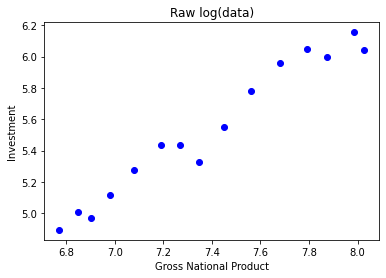

In [4]:
data['gnp_log_10'] = np.log(data['gnp'])
data['invest_log_10'] = np.log(data['invest'])

plt.plot(data['gnp_log_10'], data['invest_log_10'], 'bo')
plt.title("Raw log(data)")
plt.xlabel("Gross National Product")
plt.ylabel("Investment")
plt.show()


In [5]:
data.head()


,year,gnp,invest,cpi,interest,gnp_log_10,invest_log_10
0,1968,873.4,133.3,82.54,5.16,6.772394,4.892602
1,1969,944.0,149.3,86.79,5.87,6.850126,5.005958
2,1970,992.7,144.2,91.45,5.95,6.900429,4.971201
3,1971,1077.6,166.4,96.01,4.88,6.982492,5.114395
4,1972,1185.9,195.0,100.00,4.50,7.078257,5.273000


_NOTE : Lorsque l’on traite des données monétaires, on travaille souvent en échelle logarithmique (pour prendre en compte les différences d’échelle)._


_Les questions suivantes (3 à 6) doivent être réalisées par l’intermédiaire d’opérations élémentaires, sans utiliser de librairies existantes._


### <ins>Question 3 :</ins>

> Pour la régression de ”Investment” (variable à expliquer, output) sur ”GNP” (variable explicative, covariable), estimer l’intercept et la pente, leurs écart-types, ainsi que le coefficient de détermination. Les afficher dans une forme lisible.


On part de la formule : $Z^TZ\hat{\theta}=Z^TY$ avec $\hat{\theta}$ une solution.

On a donc $\hat{\theta} = (Z^TZ)^{-1}Z^TY$


- Intercept et Pente


In [6]:
def calculate_X(abscissa):
    return np.array(data[abscissa]).reshape(-1, 1)

def calculate_Z(X):
    return np.array([[1, x[0]] for x in X])

def calculate_Y(ordinate):
    return np.array(data[ordinate]).reshape(-1, 1)

def calculate_thetas(Y, Z):
    return inv(Z.T@Z)@Z.T@Y

In [7]:
X = calculate_X('gnp_log_10')
Y = calculate_Y('invest_log_10')
Z = calculate_Z(X)

In [8]:
thetas = calculate_thetas(Y, Z)
theta_0 = thetas[0][0]
theta_1 = thetas[1][0]

In [14]:
print(f'Intercept de la régression (theta_0): {theta_0:.4f}')
print(f'Pente de la régression (theta_1): {theta_1:.4f}')


Intercept de la régression (theta_0): -1.9636
Pente de la régression (theta_1): 1.0153


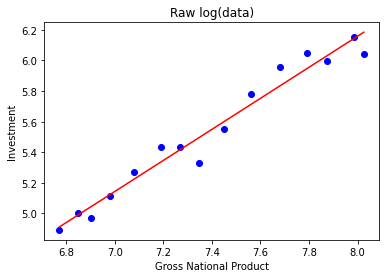

In [10]:
ols = theta_1 * data['gnp_log_10'] + theta_0

plt.plot(data['gnp_log_10'], data['invest_log_10'], 'bo')
plt.plot(data['gnp_log_10'], ols, 'r')
plt.title("Raw log(data)")
plt.xlabel("Gross National Product")
plt.ylabel("Investment")
plt.show()


- Ecart-types : $\sqrt{\frac{1}{n} \sum_{i=1}^n (x_{i} - \bar{x}_{n})^2}$


In [17]:
def calculate_standard_residuals(Z, Y, thetas):
    return np.sqrt(((Z@thetas - Y) ** 2).sum() / (X.shape[0] - X.shape[1] - 1))


def calculate_standard_deviations(Z, Y, thetas):
    return calculate_standard_residuals(Z, Y, thetas) * np.sqrt(np.diag(inv(Z.T@Z)))


theta_0_standard, theta_1_standard = calculate_standard_deviations(
    Z, Y, thetas)

print(f'Ecart-type de l\'intercept: {theta_0_standard:.4f}')
print(f'Ecart-type de la pente: {theta_1_standard:.4f}')


Ecart-type de l'intercept: 0.4095
Ecart-type de la pente: 0.0554


- coefficient de détermination : $$R^2 = \frac{\sum_{i=1}^n{(\hat{Y}_i - \bar{Y})^2}}{\sum_{i=1}^n{(Y_i - \bar{Y})^2}}$$

In [18]:
def calculate_r2(Z,Y,thetas):
    numerator = ((Z@thetas - Y.mean()) ** 2).sum()
    denumarator = ((Y - Y.mean()) ** 2).sum()
    return numerator / denumarator

r2 = calculate_r2(Z, Y, thetas)

print(f'Coefficient de détermination R² : {r2:.4f}')


Coefficient de détermination R² : 0.9628


### <ins>Question 4 :</ins>

> La pente estimée précédemment est-elle statistiquement significative ? On fera un test de student (t-test). Donner la valeur de la statistique de test ainsi que la p-valeur.


### <ins>Question 5 :</ins>

> Pour GNP égal à 1000, estimer l’investissement prédit par le modèle. Pour GNP égal à 1000, donner l’intervalle de confiance pour la valeur prédite et l’intervalle de confiance pour la variable à expliquer “Investment”, au niveau 90%. On pourra se référer à la section 3.1.3 “Confidence intervals for the predicted values” du polycopié dans laquelle chaque intervalle est défini, $CI(z)$ et $PI(z)$, respectivement (avec les notations du polycopié, $z = (1,1000)^T$ ).


### <ins>Question 6 :</ins>

> Sur un graphe avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer les données, la droite de régression, ainsi que les intervalle CI et PI (pour toutes les valeurs de log(GNP) comprises entre le maximum et le minimum observé sur les données)


### <ins>Question 7 :</ins>

> En utilisant des classes/librairies existantes, donner l’intercept, la pente, le coefficient de détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.


### <ins>Question 8 :</ins>

> Sur un graphe avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer les données, la droite de régression, ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 (on donnera à ce point une couleur différente).


_NOTE : On introduit une nouvelle variable explicative, la variable interest (sans transformation logarithmique). Les questions suivantes (9 à 12) doivent être réalisées par l’intermédiaire d’opéra- tions élémentaires, sans utiliser de librairies existantes (on utilisera par exemple inv et eig de numpy.linalg)._


### <ins>Question 9 :</ins>

> Pour la régression de Investment sur GNP et Interest, calculer la matrice de Gram non standardisée $Z^TZ$. Est-elle de rang plein ?


### <ins>Question 10 :</ins>

> Pour la régression de Investment sur GNP et interest, estimer les 3 coefficients et leurs écarttypes ainsi que le coefficient de détermination. En plus, faire un test de Student de significativité de chaque coefficient (donner la statistique de test et la p-valeur). Afficher les résultats dans une forme convenable. Discuter de la significativité des coefficients.


### <ins>Question 11 :</ins>

> Pour les valeurs de GNP 1000 et interest 10, i.e., $z =(1, 1000, 10)^T$ , prédire log(investment) et donner les intervalles de confiance CI(z) et PI(z) au niveau 99.9%.


### <ins>Question 12 :</ins>

> Sur un même graphe à 3 dimensions avec les axes suivants : log(GNP), Interest, and log(Investment), tracer les données, le “plan” de régression et les surfaces correspondantes aux intervalles de confiance à 99.9% (ces surfaces seront tracées sur le domaine de définition des données). On pourra par exemple utiliser la librairie mplot3D


### <ins>Question 13 :</ins>

> En utilisant des classes/librairies existantes, donner les coefficients de régression, le coefficient de détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 et interest 10. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.
